In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/classification_kNN_Ex1.csv')
df

cid   R   F           M customer_value
0          1069  19   4   486.00000              M
1          1113  54   4   557.50000              M
2          1250  19   2   791.50000              M
3          1359  87   1   364.00000              L
4          1823  36   3   869.00000              M
...         ...  ..  ..         ...            ...
32261   2179544   1   1  3753.00000              M
32262   2179568   1   1   406.00000              L
32263   2179605   1   1  6001.00000              M
32264   2179643   1   1   887.00000              L
32265  20002000  24  27  1814.62963              H

[32266 rows x 5 columns]

In [ ]:
CustomerData = df[['R', 'F', 'M']]
CustomerData.head()  #head()功能是顯示前五筆資料

R  F      M
0  19  4  486.0
1  54  4  557.5
2  19  2  791.5
3  87  1  364.0
4  36  3  869.0

In [ ]:
CustomerTarget = df['customer_value']
CustomerTarget[:5]

0    M
1    M
2    M
3    L
4    M
Name: customer_value, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    CustomerData,
    CustomerTarget,
    train_size = 0.75,
    stratify = CustomerTarget,
    random_state = 42
)

print("X_train: {:.0f}".format(len(X_train)))
print("X_test: {:.0f}".format(len(X_test)))
print("y_train: {:.0f}".format(len(y_train)))
print("y_test: {:.0f}".format(len(y_test)))

X_train: 24199
X_test: 8067
y_train: 24199
y_test: 8067


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
mykNN = KNeighborsClassifier(n_neighbors = 3)
mykNN

KNeighborsClassifier(n_neighbors=3)

In [ ]:
mykNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_kNN_pred = mykNN.predict(X_test)
y_kNN_pred

array(['M', 'H', 'L', ..., 'L', 'L', 'H'], dtype=object)

In [ ]:
from sklearn import metrics

In [ ]:
acc_kNN = metrics.accuracy_score(y_test, y_kNN_pred)
print("Accuracy: {:.2f}".format(acc_kNN))

Accuracy: 0.76


In [ ]:
mycm_kNN = metrics.confusion_matrix(y_test, y_kNN_pred)
print('Confusion Matrix: \n', mycm_kNN)

Confusion Matrix: 
 [[2153   22  548]
 [  30 2080  392]
 [ 563  401 1878]]


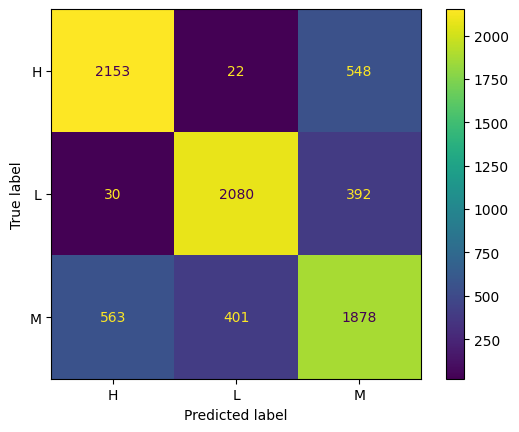

In [ ]:
metrics.ConfusionMatrixDisplay(confusion_matrix = mycm_kNN, display_labels = mykNN.classes_).plot()

In [ ]:
newdata = [[5.0, 2.0, 2100], [1.0, 6.0, 5000]]
print(newdata)
y_newpred_kNN_c = mykNN.predict(newdata)
print(y_newpred_kNN_c)

[[5.0, 2.0, 2100], [1.0, 6.0, 5000]]
['H' 'M']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#進階補充(如果已經熟悉上述功能之後再試試看這一段)
#這一段是進階補充，可以依照自己需求練習，問題如下：

#各位可以適度調整n_neighbors=k這個參數值大小，並且留意一下鄰居數k設定較多(12位最近鄰居)
#或較少(1位最近鄰居)的時候與分類模型的預測正確率(Accuracy)之間的波動關係。
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

acc_kNN = []
for k in range(1, 13):
    mykNN = KNeighborsClassifier(n_neighbors = k)
    mykNN.fit(X_train, y_train)
    y_kNN_pred = mykNN.predict(X_test)
    acc_kNN.append(metrics.accuracy_score(y_test, y_kNN_pred))


X = range(1, 13)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(X, acc_kNN, 'o-')

plt.show()
"""

"\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn import metrics\n\nacc_kNN = []\nfor k in range(1, 13):\n    mykNN = KNeighborsClassifier(n_neighbors = k)\n    mykNN.fit(X_train, y_train)\n    y_kNN_pred = mykNN.predict(X_test)\n    acc_kNN.append(metrics.accuracy_score(y_test, y_kNN_pred))\n\n\nX = range(1, 13)\nplt.xlabel('k')\nplt.ylabel('Accuracy')\nplt.plot(X, acc_kNN, 'o-')\n\nplt.show()\n"

In [ ]:
#acc_kNN